### [문자열 압축](https://school.programmers.co.kr/learn/courses/30/lessons/60057)

In [15]:
def solution(s):
    LEN = len(s)
    answer = LEN
    for i in range(1, LEN+1):
        n_s = ''
        string, cnt = s[:i], 1
        share = LEN//i
        for j in range(1, share+1):
            next_string = s[j*i:j*i+i]
            if string == next_string:
                cnt += 1
            else :
                n_s += f'{cnt}{string}' if cnt > 1 else f'{string}'
                string = next_string
                cnt = 1
                if j == share:
                    n_s += next_string
        
        n_s += s[j*i+i:]
        n_len = len(n_s)
        print(f'{i=}, {n_s=}, {n_len=}')
        if n_len < answer:
            answer = n_len
            
    return answer

In [16]:
s = 'abcabcdede'
solution(s)

i=1, n_s='abcabcdede', n_len=10
i=2, n_s='abcabc2de', n_len=9
i=3, n_s='2abcdede', n_len=8
i=4, n_s='abcabcdede', n_len=10
i=5, n_s='abcabcdede', n_len=10
i=6, n_s='abcabcdede', n_len=10
i=7, n_s='abcabcdede', n_len=10
i=8, n_s='abcabcdede', n_len=10
i=9, n_s='abcabcdede', n_len=10
i=10, n_s='abcabcdede', n_len=10


8

- 다른 풀이  
  list comprehension을 이용해 각 반복 과정을 연산하는 걸 최적화

In [ ]:
def compress(text, tok_len):
    words = [text[i:i+tok_len] for i in range(0, len(text), tok_len)]
    res = []
    cur_word = words[0]
    cur_cnt = 1
    for a, b in zip(words, words[1:] + ['']):
        if a == b:
            cur_cnt += 1
        else:
            res.append([cur_word, cur_cnt])
            cur_word = b
            cur_cnt = 1
    return sum(len(word) + (len(str(cnt)) if cnt > 1 else 0) for word, cnt in res)

def solution(text):
    return min(compress(text, tok_len) for tok_len in list(range(1, int(len(text)/2) + 1)) + [len(text)])


### [점 찍기](https://school.programmers.co.kr/learn/courses/30/lessons/140107?language=python3)

- 유클리드 거리를 이용해 원점에서의 거리를 계산에서 세기  
- point는 이중 반복문을 사용하는 것이 아니라, 제시된 최대 거리에서 하나의 축의 거리를 빼고,  
  남은 거리에서 가능한 최대 숫자를 구현하는 것  
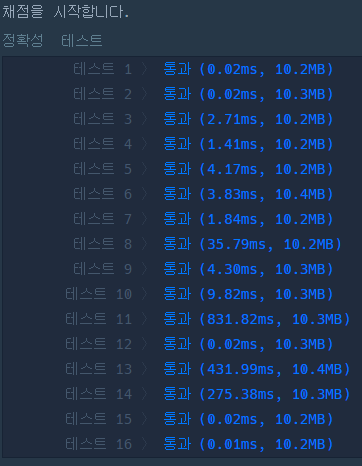

In [3]:
def solution(k, d):
    answer = 0
    max_len = d // k
    for i in range(max_len+1):
        x = i * k
        extra = int((d**2 - x**2)**0.5 / k)
        
        answer += extra + 1 # 원점을 포함해서 더하기
        
    return answer


In [12]:
k = 2
d = 4
solution(k, d)

answer=8, i=2, j=1
answer=7, i=2, j=0
answer=6, i=1, j=1


6

### [후보키]()

In [109]:
from itertools import combinations, permutations

def solution(relation):
    target = len(relation)
    
    candis = [str(e) for e, x in enumerate(zip(*relation)) if len(set(x)) == target]
    answer = len(candis)
    
    relation = [x for x in zip(*relation) if len(set(x)) != len(relation)]    
    c = 1
    used_pattern = []
    while c <= len(relation):
        c += 1
        idx_list = [x for x in range(len(relation))]
        # 가능한 패턴
        combis = ["".join(list(map(str, x))) for x in list(combinations(idx_list, c))]
        # 이미 사용된 조합을 포함하는지 확인
        combis = [item for item in combis if not any(sub in item for sub in used_pattern)]
        
        for combi in combis:
            new_relation = relation[int(combi[0])]
            for comb in combi[1:]:
                new_relation = [x+y for x, y in list(zip(new_relation, relation[int(comb)]))]
                
            if len(set(new_relation)) == target:
                all_pattern = ["".join(list(x)) for x in list(permutations(combi, len(combi)))]
                used_pattern += all_pattern
                answer += 1
                
    print(f'{answer=}, {used_pattern=}')

In [110]:
relation = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]
solution(relation)

answer=2, used_pattern=['01', '10']


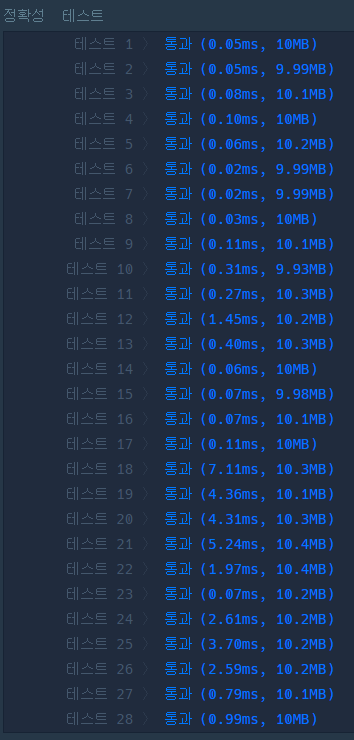

In [ ]:
from itertools import combinations

def solution(relation):
    target = len(relation[0])
    rows = len(relation)

    # 모든 컬럼 조합을 찾기 위한 인덱스 리스트
    indices = range(target)
    
    # 후보키를 저장할 리스트
    candidate_keys = []

    # 1개의 컬럼부터 target개의 컬럼까지의 조합을 차례대로 확인
    for r in range(1, target + 1):
        for comb in combinations(indices, r):
            # 해당 조합의 튜플 값을 추출
            temp = [tuple(item[i] for i in comb) for item in relation]
            # 유일성을 만족하는지 확인
            if len(set(temp)) == rows:
                # 최소성을 확인
                if not any(set(key).issubset(comb) for key in candidate_keys):
                    candidate_keys.append(comb)

    return len(candidate_keys)

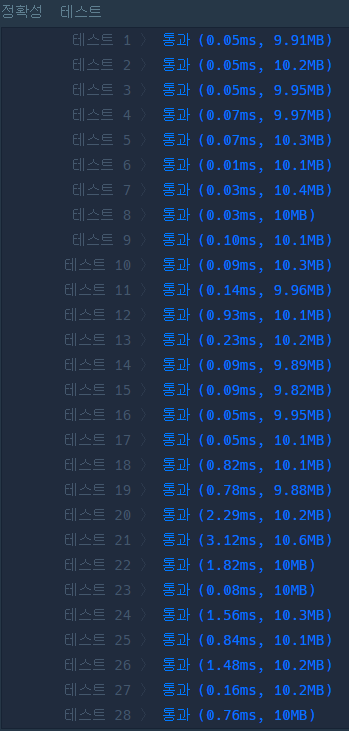

In [79]:
from itertools import combinations


def solution(relations: list) -> int:
    valid_keys: list = list()
    degree: int = len(relations[0])

    # 최소성 만족 체크.
    def is_minimal(key: tuple) -> bool:
        for valid_key in valid_keys:
            if all(column in key for column in valid_key):  # key.contains_all(valid_key)
                return False
        return True

    # 집합 자료형을 이용하여 유일성 만족 체크.
    def is_unique(key: tuple) -> bool:
        distinct: set = set(tuple(row[idx] for idx in key) for row in relations)
        return len(distinct) == len(relations)

    # 최소성 & 유일성 필터 
    def apply_filter(iterable) -> filter:
        return filter(lambda key: is_minimal(key) and is_unique(key), iterable)

    # 낮은 차수부터 조합 실행 
    for deg in range(degree):
        combination = combinations(range(degree), deg + 1)
        for key in apply_filter(combination):
            valid_keys.append(key)

    return len(valid_keys)

TypeError: 'in <string>' requires string as left operand, not list

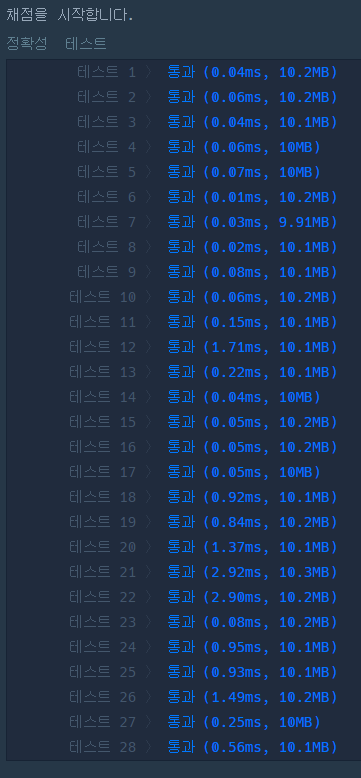

In [55]:
import itertools as z

def solution(a):
 b,y=[],len(a[0])
 for i in range(y):
  for c in filter(lambda x:not any(all(e in x for e in g)for g in b)and len({tuple(d[f]for f in x)for d in a})==len(a),z.combinations(range(y),i+1)):b.append(c)
 return len(b)

[(0, 1), (0, 2), (1, 2)]